In [1]:
from src.all_in_one import *
from src.basic_variables import *

2025-01-09 11:45:50,616 - INFO - Processed 756 records so far.
2025-01-09 11:45:51,589 - INFO - Processed 342 records so far.


## Initiate Intake Dataset

In [2]:
int_file = path_manager.get_data_file(Category.PS, PSFile.PSNT)
intake = get_df(int_file.path, int_file.sheet)
intake_dataset = Dataset(config_file, int_file.sheet)
filtered_intake = filter_dataframe_on_date(
    intake, intake_dataset.dvars, START, END, FilterType.IN
)

In [ ]:
# intake.head()
filtered_intake

## Filter New Intake

In [3]:
new_nt_s1 = filter_dataframe_on_date(intake, "nt_s1", START, END)
new_intake = filter_dataframe_on_date(intake, "nt_s2", START, END)
new_nt_s3 = filter_dataframe_on_date(intake, "nt_s3", START, END)
new_reintake = filter_dataframe_on_date(intake, "nt_re", START, END)

In [27]:
new_intake.to_clipboard()

In [ ]:
new_reintake

## Intake Number of Sessions

In [4]:
nt_s1 = new_nt_s1.shape[0]
nt_s2 = new_intake.shape[0]
nt_s3 = new_nt_s3.shape[0]
nt_re = new_reintake.shape[0]

In [5]:
nt_s1 + nt_s2 + nt_s3 + nt_re

32

## New Intake Sex and Age Groups

In [6]:
f_new_intake = pd.merge(
    new_intake, rebuilt_scr[["rid", "sex", "age"]], on="rid", how="left"
)
f_new_intake[["rid", "fcid", "sex", "age"]]

,rid,fcid,sex,age
0,R1264,8110080032,Female,49
1,R1260,8110080033,Female,43
2,R1337,8110100023,Male,54
3,R1292,8110100024,Female,40
4,R1250,8110100025,Female,30
5,R1511,8110100026,Female,29
6,R1378,8110100027,Female,32
7,R1232,8110110022,Female,39
8,R1497,8110110024,Male,31
9,R1267,8110020133,Female,32


In [7]:
# f_new_intake['sex'].value_counts(dropna=False, normalize=True)
f_new_intake["sex"].value_counts(dropna=False, normalize=False)

sex
Female    8
Male      5
Name: count, dtype: int64

In [8]:
categorize_and_count_ages(f_new_intake["age"])

age
18-27    0
28-37    6
38-47    4
48-57    2
58-67    1
68-77    0
Name: count, dtype: int64

## Beneficiaries Victimhood

In [9]:
# new_intake['fcid', intake_dataset.bovars]
fcid = ["fcid"]
victimhood_df = new_intake.loc[:, fcid + intake_dataset.bovars]

In [ ]:
# Rename victimhood columns
new_victimhood_columns_names = {
    "family_of_missing": "Family of Missing",
    "survivor_of_detention": "Survivor of Detention",
    "primary_torture": "Primary Torture",
    "secondary_torture": "Secondary Torture",
    "sexual_violation_a": "Sexual Violation by Armed Groups",
    "sexual_violation_p": "Sexual Violation in Prison",
    "hrd": "Human Rights Defender",
    "journalist": "Journalist",
    "wov": "War and Organized Violence",
    "stgbv": "Sexual Torture and Gender Based Violence",
    "lgbti": "LGBTI",
    "other": "Other",
}
victimhood_df.rename(columns=new_victimhood_columns_names, inplace=True)
victimhood_df

,fcid,Family of Missing,Survivor of Detention,Primary Torture,Secondary Torture,Sexual Violation by Armed Groups,Sexual Violation in Prison,Human Rights Defender,Journalist,War and Organized Violence,Sexual Torture and Gender Based Violence,LGBTI,Other
40,8110080032,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No
41,8110080033,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No
65,8110100023,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No
66,8110100024,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No
67,8110100025,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No
68,8110100026,Yes,No,No,Yes,No,No,No,No,Yes,Yes,No,No
69,8110100027,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No
91,8110110022,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No
93,8110110024,No,No,No,Yes,No,No,No,No,Yes,No,No,No
342,8110020133,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No


In [69]:
count_df = new_intake[intake_dataset.bovars].apply(lambda x: x.value_counts()).fillna(0)
count_df = count_df.T.reset_index().rename(
    columns={"index": "victimhood"}
)  # Transposing
count_df["No"] = count_df["No"].astype("Int64")
count_df["Yes"] = count_df["Yes"].astype("Int64")


In [11]:
count_df

,victimhood,No,Yes
0,family_of_missing,3,10
1,survivor_of_detention,7,6
2,primary_torture,7,6
3,secondary_torture,0,13
4,sexual_violation_a,11,2
5,sexual_violation_p,11,2
6,hrd,13,0
7,journalist,13,0
8,wov,1,12
9,stgbv,10,3


In [70]:
from upsetplot import UpSet
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning, module="upsetplot")

In [71]:
# victimhood_df.to_clipboard()
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [72]:
# Convert "Yes"/"No" to boolean (True/False)
boolean_victimhood_df = victimhood_df.drop(columns="fcid").map(lambda x: x == "Yes")

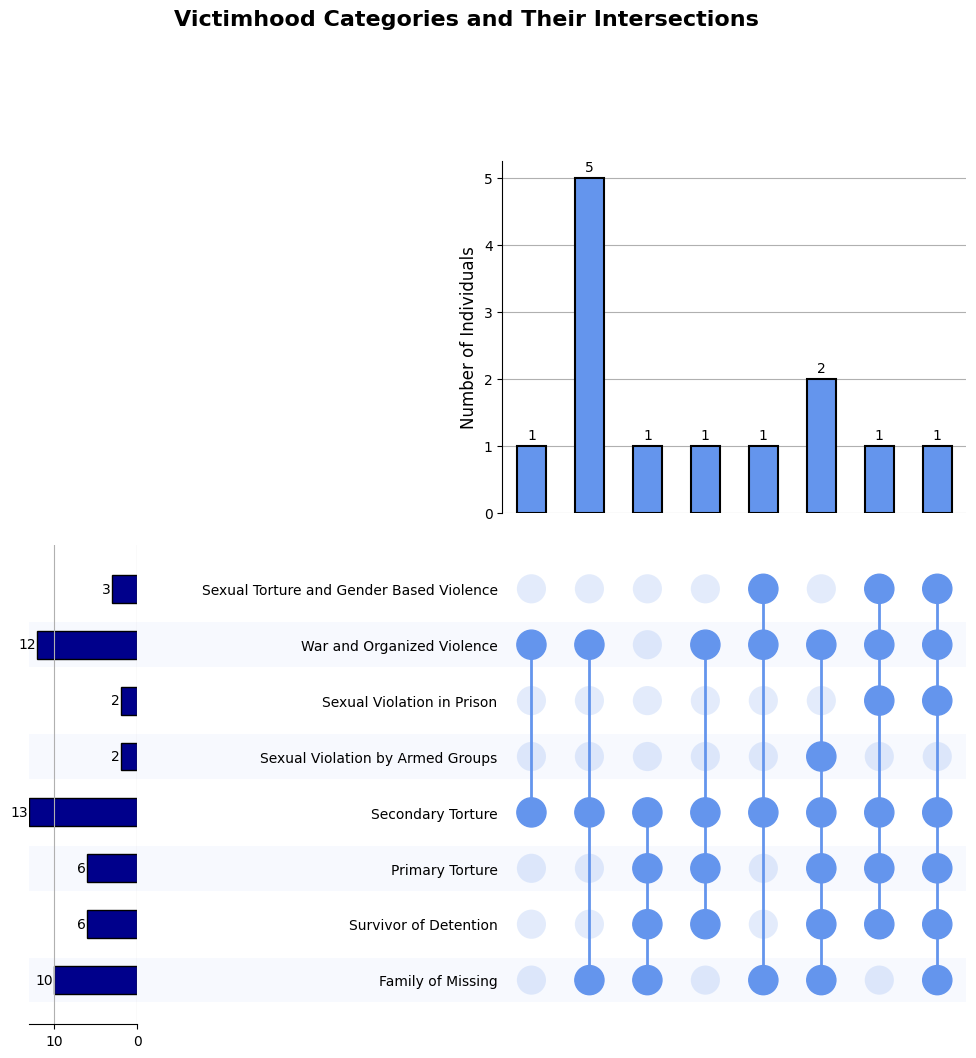

In [73]:
# Create the UpSet plot
upset_data = from_indicators(
    data=boolean_victimhood_df, indicators=boolean_victimhood_df.columns
)
# Use a clean and reliable matplotlib style
plt.style.use("default")

# Create the UpSet plot with detailed customization
upset = UpSet(
    upset_data,
    subset_size="count",  # Display subset sizes as counts
    show_counts=True,  # Show counts on bars
    sort_categories_by=None,  # Keep the original order of categories
    facecolor="cornflowerblue",  # Set bar fill color
    element_size=60,  # Increase the size of the grid and elements
    # intersection_linewidth=1.5,         # Adjust grid line width
    # totals_color="darkblue",            # Set color for totals (left-side bar chart)
)

# Modify the plot after it is generated
fig = upset.plot()

# Customize the intersection bars (manually iterate over artists)
for patch in fig["intersections"].patches:
    patch.set_edgecolor("black")  # Add black borders to the bars
    patch.set_linewidth(1.5)  # Set border line width

# Customize the totals (left-side bars)
for patch in fig["totals"].patches:
    patch.set_facecolor("darkblue")  # Set totals color
    patch.set_edgecolor("black")  # Add black border

# Add a custom title and axis labels
plt.suptitle(
    "Victimhood Categories and Their Intersections",
    fontsize=16,
    fontweight="bold",
    color="black",
)
plt.xlabel("Victimhood Category Combinations", fontsize=11, color="black")
plt.ylabel("Number of Individuals", fontsize=12, color="black")

# Customize tick labels and fonts
plt.xticks(
    fontsize=10, rotation=45, ha="right"
)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adjust layout to prevent overlapping
plt.subplots_adjust(top=0.85, left=0.15, right=0.9)

# Display the plot
plt.show()